# Classifying MNIST dataset



MNIST database is a good example of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

The MNIST dataset & more information about it is at: http://yann.lecun.com/exdb/mnist/. It consists of the following four parts:
* Training set images: train-images-idx3-ubyte.gz
* Training set labels: train-labels-idx1-ubyte.gz
* Test set images: t10k-images-idx3-ubyte.gz
* Test set labels: t10k-labels-idx1-ubyte.gz



### Build a Two layer neural network classifier


### Questions: 
What train/validation split did you use ? 
What was the accuracy ?
What can you do to improve it ?

### Downloading and loading training data
1. Download using curl or whatever you like
2. Unzip it
3. load using machine learning extension package (mlxtend)

In [1]:
from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')

### Explore what's in the data


In [2]:
import numpy as np
import matplotlib.pyplot as plt


# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

#X contains image 
print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
#print('\n1st row', X[0])
first_image = np.array(X[0], dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

#y contains labels
print(y[0])

Dimensions: 60000 x 784


<Figure size 640x480 with 1 Axes>

5


In [3]:
# Split train/validation; 
randP = np.random.permutation(60000)
trainIdx = randP[0:50000]
valIdx = randP[50001:]

In [4]:
X = X.reshape(60000, 1, 28, 28).astype(np.float32)/255
y = y.reshape(60000, 1).astype(np.int)
train_x = X[trainIdx,:]
train_y = y[trainIdx]
val_x = X[valIdx,:]
val_y = y[valIdx,:]

In [5]:
# converting training images into torch format
train_x  = torch.from_numpy(train_x)
train_y = torch.from_numpy(train_y)
val_x = torch.from_numpy(val_x)
val_y = torch.from_numpy(val_y)

In [6]:
# if torch.cuda.is_available():
#     train_x = train_x.cuda()
#     train_y = train_y.cuda()
#     val_x = val_x.cuda()
#     val_y = val_y.cuda()

In [7]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.CNN = Sequential(
            Conv2d(1, 6, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            Conv2d(6, 6, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            Conv2d(6, 6, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            Conv2d(6, 6, kernel_size=3, stride=1, padding=1),
        )
        
        self.linear_single = Sequential(
            Linear(6*784,10),
        )
        

    # Defining the forward pass    
    def forward(self, x):
        
        #OPTION B
        x = self.CNN(x)
        x = x.view(x.size(0), -1)
        x = self.linear_single(x)
        
        return x

In [8]:
# defining the model
model = Net()

# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.01)

# defining the loss function
criterion = CrossEntropyLoss()

# if torch.cuda.is_available():
#     model = model.cuda()
#     criterion = criterion.cuda()

print(model)

Net(
  (CNN): Sequential(
    (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (linear_single): Sequential(
    (0): Linear(in_features=4704, out_features=10, bias=True)
  )
)


In [9]:
def train(epoch):
    model.train()
    
    # getting the training set
    x_train, y_train = Variable(train_x), Variable(train_y)

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    
    # Set the y dimensions correctly
    y_train = y_train.squeeze(1).long()

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    train_losses.append(loss_train.item())

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()


In [10]:
def evaluate(epoch):
    model.eval()
    
    with torch.no_grad():
    
        # getting the val set
        x_val, y_val = Variable(val_x), Variable(val_y)
    
        # prediction for training and validation set
        output_val = model(x_val)
    
        # Set the y dimensions correctly
        y_val = y_val.squeeze(1).long()

        # computing the validation loss
        loss_val = criterion(output_val, y_val)
        val_losses.append(loss_val.item())
    
        if epoch%10 == 0:
            # printing the validation loss
            print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)
    

In [11]:
# empty list to store training losses
train_losses = []
val_losses = []

In [12]:
# defining the number of epochs
n_epochs = 200

# training the model
for epoch in range(n_epochs):
    train(epoch)
    evaluate(epoch)

Epoch :  1 	 loss : tensor(6.4841)
Epoch :  11 	 loss : tensor(2.2111)
Epoch :  21 	 loss : tensor(1.3333)
Epoch :  31 	 loss : tensor(0.5463)
Epoch :  41 	 loss : tensor(0.4029)
Epoch :  51 	 loss : tensor(0.3162)
Epoch :  61 	 loss : tensor(0.2857)
Epoch :  71 	 loss : tensor(0.2629)
Epoch :  81 	 loss : tensor(0.2479)
Epoch :  91 	 loss : tensor(0.2350)
Epoch :  101 	 loss : tensor(0.2243)
Epoch :  111 	 loss : tensor(0.2153)
Epoch :  121 	 loss : tensor(0.2072)
Epoch :  131 	 loss : tensor(0.1998)
Epoch :  141 	 loss : tensor(0.1931)
Epoch :  151 	 loss : tensor(0.1872)
Epoch :  161 	 loss : tensor(0.1820)
Epoch :  171 	 loss : tensor(0.1774)
Epoch :  181 	 loss : tensor(0.1733)
Epoch :  191 	 loss : tensor(0.1697)


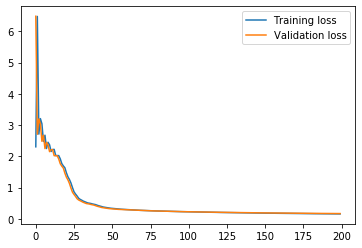

In [14]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
X_test, y_test = loadlocal_mnist(
        images_path='t10k-images.idx3-ubyte', 
        labels_path='t10k-labels.idx1-ubyte')
print(X_test.shape)

(10000, 784)


In [17]:
X_test = X_test.reshape(10000, 1, 28, 28).astype(np.float32)/255
y_test = y_test.reshape(10000, 1).astype(np.int)
test_x  = torch.from_numpy(X_test)
test_y = torch.from_numpy(y_test)

In [20]:
output = model(train_x)
_,predictions = torch.max(output, axis=1)
accuracy_score(train_y, predictions.cpu())

0.95358

In [18]:
# if torch.cuda.is_available():
#     test_x = test_x.cuda()
output = model(test_x)
_,predictions = torch.max(output, axis=1)
accuracy_score(test_y, predictions.cpu())

0.955